In [ ]:
  import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
raw_data = pd.read_csv('XAUUSD60streamlined.csv')
raw_data

FileNotFoundError: ignored

In [ ]:
raw_data.shape

(50000, 5)

In [ ]:
tail_raw = raw_data.tail(168)
tail_raw = tail_raw[['Open','High', 'Low', 'Close']]

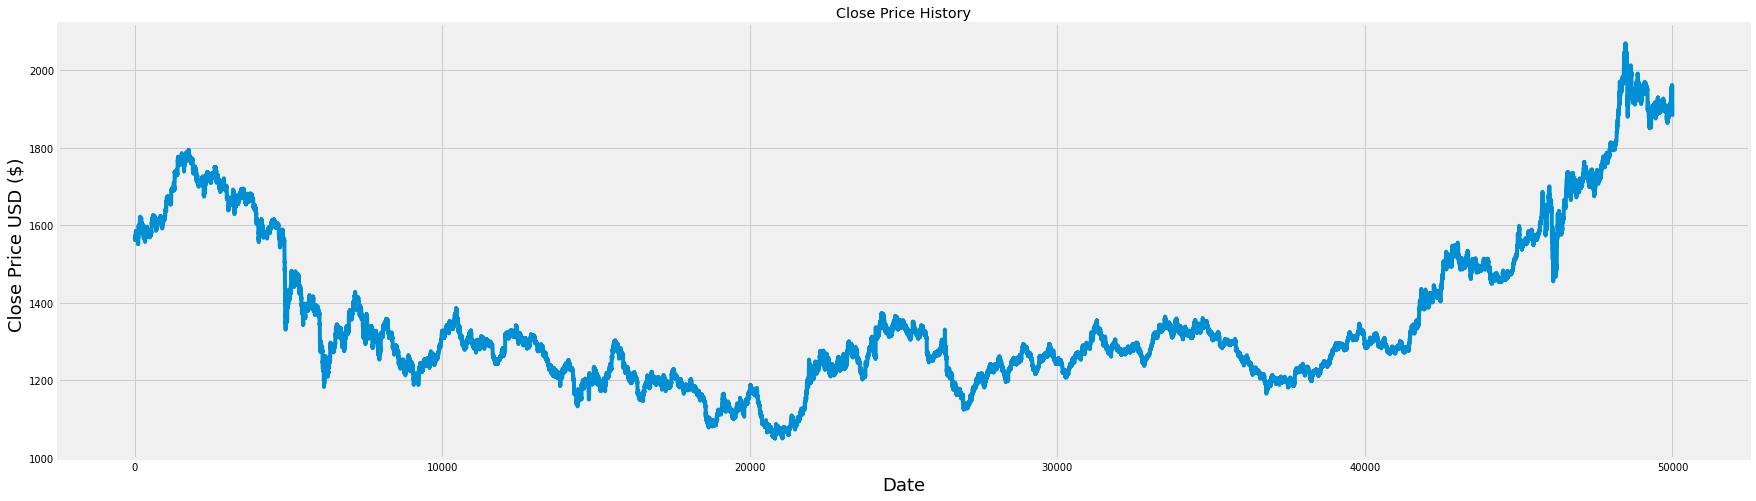

In [ ]:
plt.figure(figsize=(27,8))
plt.title('Close Price History')
plt.plot(raw_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($) ',  fontsize=18)
plt.show()

In [ ]:
data_all = raw_data.filter(['Open','High','Low','Close']).values
data_test = raw_data.filter(['Open','High','Low','Close'])
data_close = raw_data.filter(['Close']).values
data_all

array([[1561.375, 1566.751, 1559.626, 1564.796],
       [1564.78 , 1569.378, 1564.384, 1569.232],
       [1569.146, 1572.376, 1568.905, 1570.179],
       ...,
       [1958.725, 1958.725, 1934.538, 1938.078],
       [1938.108, 1938.878, 1901.045, 1911.468],
       [1911.415, 1911.548, 1868.448, 1880.518]])

In [ ]:
data_all

In [ ]:
len_training = math.ceil(len(data_close) * 0.8)
len_training

40000

In [ ]:
unscaled_train_data = data_all[0:len_training, :]
training_scaler = MinMaxScaler(feature_range=(0,1))
train_data = training_scaler.fit_transform(unscaled_train_data)
x_train = []
y_train = []

for i in range(168, len(train_data)):
  x_train.append(train_data[i-168:i])
  y_train.append(train_data[i,3])
  if i <= 168:
    print(x_train)
    print(y_train)
    print()



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(39832, 168, 4)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

39832/39832 [==============================] - 2344s 59ms/step - loss: 1.6205e-04


In [ ]:
unscaled_test_data = data_all[len_training - 168:, :]
tmpdata = data_all[len_training - 168:, :]
testing_scaler = MinMaxScaler(feature_range=(0,1))
autre_scaler = MinMaxScaler(feature_range=(0,1))
test_data = testing_scaler.fit_transform(unscaled_test_data)
tmpdata = tmpdata[:,3]
tmpdata = np.reshape(tmpdata, (tmpdata.shape[0], 1))
#print(np.reshape(tmpdata, (tmpdata.shape[0], 1)))
temp = autre_scaler.fit_transform(tmpdata)

x_test = []
y_test = data_close[len_training:, :]
for i in range(168, len(test_data)):
  x_test.append(test_data[i-168:i])
  #if i <= 169:
    #print(x_test)
print(temp)


In [ ]:

x_test = np.array(x_test)
x_test

In [ ]:
x_test.shape

(10000, 168, 4)

In [ ]:
predictions = model.predict(x_test)
predictions = autre_scaler.inverse_transform(predictions)

In [ ]:
predictions.shape

(10000, 1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test

In [ ]:
predictions

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
predictions.reshape((-1,1)).shape

(10000, 1)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.9736080306640114

In [ ]:
train = raw_data[:len_training]
dataplt = {'Predictions':predictions.flatten(), 'Close':raw_data[len_training:]["Close"]}
valid = pd.DataFrame(data=dataplt)
#valid = np.array(data_close[len_training:])
#valid['Predictions'] = predictions.flatten()
plt.figure(figsize=(27,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price per Hour', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']], marker='o', markersize=6, linewidth=1)
plt.plot(valid[['Predictions']], marker='|', markersize=150, linewidth= 0)
plt.plot(valid[['Predictions']], marker='v', markersize=20, linewidth= 0)
#plt.xlim(49300,49325)
#plt.ylim(1830,1900)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

NameError: ignored

In [ ]:
tail_raw
X_pred = []
scaled_tail = testing_scaler.transform(tail_raw)
X_pred.append(scaled_tail)
X_pred = np.array(X_pred)
pred_price = model.predict(X_pred)
pred_price


array([[0.7697577]], dtype=float32)

In [ ]:
pred_price = autre_scaler.inverse_transform(pred_price)

In [ ]:
pred_price

array([[1885.351]], dtype=float32)

In [ ]:
valid

,Predictions,Close
40000,1285.831055,1294.475
40001,1285.558716,1291.235
40002,1282.998291,1287.395
40003,1278.818237,1287.935
40004,1278.642822,1287.035
...,...,...
49995,1954.283325,1958.558
49996,1952.653687,1958.725
49997,1953.308838,1938.078
49998,1937.323853,1911.468
